In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilsVisualize import getModelDataReduce
import matplotlib.colors as mcolors

In [2]:
mode = "TEST"
modelNames = ["p2", "p4", "p8", "p16", "m1", "m2", "m4", "m8", "m16", "m32"]
# modelNames = ["m16"]
visualizeMode = "FE_REDUCE"
cutoffRow = None
showPlot = False
filenamePrefix = 'FE_REDUCE-boxplot'
ylabel = 'Fraction of Violation ($E_{law}$)'

my_pal = {
    "p2": "g",
    "p4": "g",
    "p8": "g",
    "p16": "g",
    "m1": "r",
    "m2": "r",
    "m4": "r",
    "m8": "r",
    "m16": "r",
    "m32": "r",
}

In [3]:
dfLongArray = []
for modelName in modelNames:
    df, dfLong, dfWide = getModelDataReduce(
        modelName, mode, visualizeMode=visualizeMode, cutoffRow=cutoffRow
    )
    print(modelName, df.shape)
    dfLongArray.append(dfLong)
    if showPlot:
        sns.set_theme()
        fig, ax = plt.subplots()
        xp = dfWide.index.values
        yp = dfWide["frac"].values

        ax.plot(xp, yp, "--*", label=modelName)
        ax.set_title(visualizeMode)
        ax.set_xlabel("Time")
        ax.set_ylabel(visualizeMode)
        plt.legend()
        plt.show()

dfLongAppended = pd.concat(dfLongArray)

p2 (801, 50)
p4 (401, 50)
p8 (201, 50)
p16 (101, 44)
m1 (1601, 50)
m2 (801, 50)
m4 (401, 50)
m8 (201, 50)
m16 (101, 50)
m32 (51, 50)


In [4]:
display(dfWide.head())
display(dfLong.head())

,sum,tot,frac
0.0,0,50,0.00
8.0,0,50,0.00
16.0,4,50,0.08
24.0,1,50,0.02
32.0,0,50,0.00


,time,type,value,model
0,0.0,frac,0.00,m32
1,8.0,frac,0.00,m32
2,16.0,frac,0.08,m32
3,24.0,frac,0.02,m32
4,32.0,frac,0.00,m32


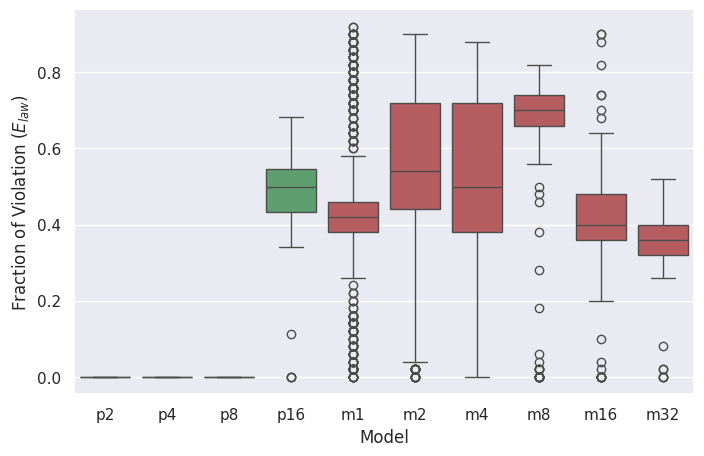

In [5]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8, 5))

# sns.violinplot(data=dfLongAppended, x="model", y="value", ax=ax, density_norm='width')
sns.boxplot(data=dfLongAppended, x="model", y="value", hue='model', legend=False, ax=ax, palette=my_pal)
ax.set_xlabel("Model")
ax.set_ylabel(ylabel)
# ax.set_ylim([0, 1.1])
cwd = sys.path[0]
cutoffRow = 'None' if cutoffRow is None else cutoffRow
filename = f'{filenamePrefix}-Cut-{cutoffRow}.png'
filePath = os.path.join(os.getcwd(), 'o8_visualize', filename)
plt.savefig(filePath, dpi=300, bbox_inches="tight")